```{contents}

```

## Resampling Methods

Resampling methods are **techniques that repeatedly draw samples from observed data** to:

* Estimate the **variability** of a statistic
* Construct **confidence intervals**
* Test hypotheses
* Evaluate **model performance**

**Key idea:** They rely on the **data itself** rather than strong parametric assumptions (like normality).

---

### Types of Resampling Methods

### Bootstrap

* **Purpose:** Estimate the sampling distribution of a statistic and compute confidence intervals.

* **How it works:**

  1. Take your dataset of size $n$.
  2. Draw a sample of size $n$ **with replacement**.
  3. Compute the statistic (mean, median, etc.) for this resample.
  4. Repeat 1000+ times to get a distribution of the statistic.

* **Example:**
  You have 10 exam scores: `[55, 60, 62, 70, 72, 75, 78, 80, 85, 90]`.

  * Bootstrap 1000 samples → compute the mean of each sample → use percentiles to get 95% confidence interval for the mean.

---

### Permutation (Randomization) Test

* **Purpose:** Test hypotheses without relying on parametric assumptions.

* **How it works:**

  1. Compute the statistic of interest (e.g., difference in means) on original data.
  2. Shuffle group labels many times and compute the statistic each time.
  3. Compare original statistic to the distribution from shuffles → p-value.

* **Example:**
  Compare recovery times between two treatments. Shuffle treatment labels 10,000 times → check how extreme the observed difference is.

---

### Cross-Validation

* **Purpose:** Estimate model performance on unseen data.

* **How it works:**

  1. Split data into k folds.
  2. Train model on k−1 folds, test on 1 fold.
  3. Repeat k times and average the results.

* **Example:**
  You have 1000 samples → 5-fold cross-validation → average accuracy of each fold → robust estimate of model performance.

---

### Jackknife

* **Purpose:** Estimate bias and variance of a statistic.

* **How it works:**

  1. Leave out one observation at a time.
  2. Compute the statistic for each subset.
  3. Use these values to estimate bias/variance.

* **Example:**
  For data `[3, 5, 7, 9, 11]`, leave out each point → compute mean → use these 5 means to estimate variance of the mean.

---

### Advantages of Resampling Methods

* Minimal assumptions about data distribution.
* Works well with **small datasets**.
* Provides **empirical confidence intervals**, p-values, and error estimates.
* Flexible and general-purpose.

---

### Summary Table

| Method           | Purpose                    | How it Resamples         | Example Use Case             |
| ---------------- | -------------------------- | ------------------------ | ---------------------------- |
| Bootstrap        | Estimate variability / CI  | With replacement         | Mean, median, SD             |
| Permutation      | Hypothesis testing         | Shuffle labels           | Difference in group means    |
| Cross-validation | Model evaluation           | Split dataset into folds | ML model accuracy            |
| Jackknife        | Bias / variance estimation | Leave-one-out            | Mean, regression coefficient |



### Model Selection

**Model selection** is the process of choosing the **best statistical or machine learning model** from a set of candidates based on some criteria.

Key goals:

* Balance **goodness-of-fit** with **model complexity**.
* Avoid **overfitting** (model too complex) or **underfitting** (model too simple).

Commonly used criteria: **AIC, BIC, Adjusted R²**.

---

### AIC (Akaike Information Criterion)

* **Purpose:** Compare models based on **fit and complexity**.
* **Formula:**

$$
\text{AIC} = 2k - 2 \ln(L)
$$

Where:

* $k$ = number of parameters in the model

* $L$ = maximum likelihood of the model

* **Interpretation:**

  * Lower AIC → better model.
  * Penalizes models with more parameters to avoid overfitting.

* **Example:**
  Two regression models predicting house prices:

  * Model 1: AIC = 120
  * Model 2: AIC = 115 → Model 2 is preferred.

---

### BIC (Bayesian Information Criterion)

* **Purpose:** Similar to AIC, but penalizes **complexity more strongly**, especially for larger datasets.
* **Formula:**

$$
\text{BIC} = k \ln(n) - 2 \ln(L)
$$

Where:

* $n$ = number of observations

* $k$ = number of parameters

* $L$ = likelihood

* **Interpretation:**

  * Lower BIC → better model.
  * More conservative than AIC; favors simpler models when data is large.

---

### Adjusted R²

* **Purpose:** Measure how well a regression model explains variability in the data, **adjusted for number of predictors**.
* **Formula:**

$$
\text{Adjusted } R^2 = 1 - \frac{(1-R^2)(n-1)}{n-k-1}
$$

Where:

* $R^2$ = coefficient of determination

* $n$ = number of observations

* $k$ = number of predictors

* **Interpretation:**

  * Unlike $R^2$, it **penalizes adding irrelevant predictors**.
  * Higher Adjusted R² → better model.

* **Example:**

  * Model 1: R² = 0.85, k = 3 → Adjusted R² = 0.84
  * Model 2: R² = 0.87, k = 8 → Adjusted R² = 0.83 → Model 1 is preferred.

---

### Quick Comparison

| Metric      | Purpose                                   | Penalizes Complexity? | Lower/Upper Better |
| ----------- | ----------------------------------------- | --------------------- | ------------------ |
| AIC         | Model fit + complexity                    | Yes (moderate)        | Lower              |
| BIC         | Model fit + complexity (strong)           | Yes (strong)          | Lower              |
| Adjusted R² | Explains variance adjusted for predictors | Yes (adjusts R²)      | Higher             |

---

**Key Idea:**

* Use **AIC/BIC** for comparing multiple models quantitatively.
* Use **Adjusted R²** to see explanatory power **without overfitting**.


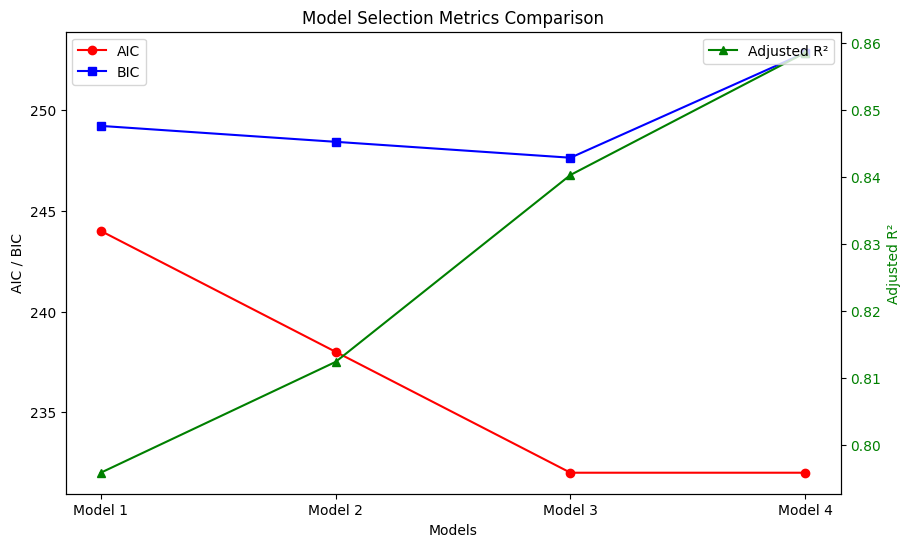

: 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Simulated data for model comparison
models = ['Model 1', 'Model 2', 'Model 3', 'Model 4']
num_params = np.array([2, 4, 6, 8])
log_likelihood = np.array([-120, -115, -110, -108])
n = 100  # number of observations

# Calculate AIC and BIC
AIC = 2*num_params - 2*log_likelihood
BIC = num_params * np.log(n) - 2*log_likelihood
R2 = np.array([0.80, 0.82, 0.85, 0.87])
Adj_R2 = 1 - (1-R2)*(n-1)/(n-num_params-1)

# Plot
fig, ax1 = plt.subplots(figsize=(10,6))

ax1.plot(models, AIC, marker='o', label='AIC', color='red')
ax1.plot(models, BIC, marker='s', label='BIC', color='blue')
ax1.set_ylabel('AIC / BIC', color='black')
ax1.set_xlabel('Models')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')
ax1.set_title('Model Selection Metrics Comparison')

# Plot Adjusted R² on secondary axis
ax2 = ax1.twinx()
ax2.plot(models, Adj_R2, marker='^', label='Adjusted R²', color='green')
ax2.set_ylabel('Adjusted R²', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='upper right')

plt.show()
